此文件对不平衡数据进行了补充

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
%matplotlib inline

# Date Explore

In [2]:
data = pd.read_csv('./data/zhejiang_4.csv', dtype={0:object, 'ORG':object, 'SPEC_CODE':object, 'MANUFACTURER':object,
                                                  'FAULT_MONTH':int, 'INST_MONTH':object, 'FAULT_QUARTER':object, 'FAULT_TYPE': object,
                                                 }, encoding='utf-8')
data_add = pd.read_csv('./data/jiangsu_4.csv', dtype={0:object, 'ORG_NO':object, 'SPEC_CODE':object, 'MANUFACTURER':object,
                                                  'FAULT_MONTH':int, 'INST_MONTH':object, 'FAULT_QUARTER':object, 'FAULT_TYPE': object,
                                                 }, encoding='utf-8')

#preview the zhejiang_4 data
data.head()
data.drop(['FAULT_QUARTER'], axis=1, inplace=True)

In [3]:
data.head()
QUIP_ID = data.columns[0]

In [4]:
data_add

,"﻿""EQUIP_ID""",FAULT_TYPE,ORG_NO,SPEC_CODE,MANUFACTURER,FAULT_MONTH,INST_MONTH,month
0,300010573131,405,32412,102,00429,7,8,32
1,270002987725,406,32408,102,00268,1,4,33
2,270002779237,402,32406,102,00495,1,3,34
3,110005878060,402,32401,102,10001,1,2,46
4,220004643292,402,32412,102,00845,1,3,46
5,180003807076,406,32408,102,00832,1,10,38
6,300011040286,402,32407,102,00417,1,3,9
7,270007239777,402,32408,102,10001,1,6,31
8,270014017647,405,32412,102,10007,1,4,21
9,270007086477,405,32409,102,00965,1,7,30


In [5]:
data_add.head()
data_add.rename(columns={data_add.columns[0]:data.columns[0], 'ORG_NO':'ORG'},inplace = True)

ORG_names = np.unique(data_add['ORG'].values)
data = pd.concat([data, data_add], ignore_index=True)

In [6]:
data.head(-5)
data['FAULT_TYPE'].value_counts()

411    54446
408    36047
409    34713
407    17937
410    13939
401    12893
404    10082
402     6567
406     2045
405     1912
403      938
dtype: int64

# feature preprocessing

In [7]:
#delete QUIP_ID
#data.drop([data.columns[0]], axis=1, inplace=True)

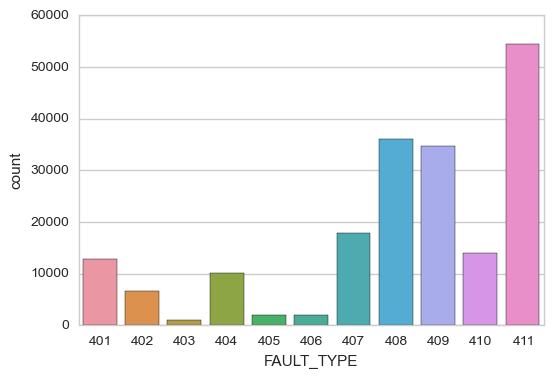

In [8]:
fig, axis0 = plt.subplots(1, 1)
sns.countplot(x='FAULT_TYPE', data=data, ax=axis0)

## ORG

/usr/lib/python2.7/dist-packages/pandas/core/index.py:2889: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1
/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


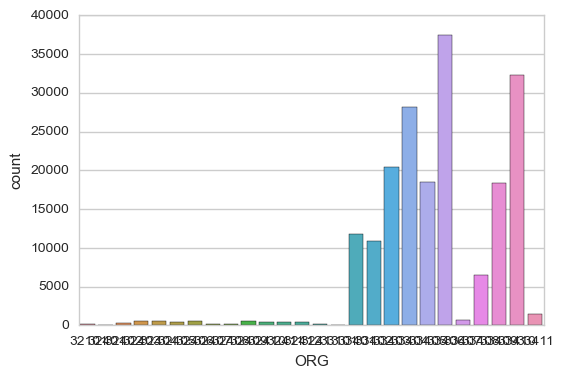

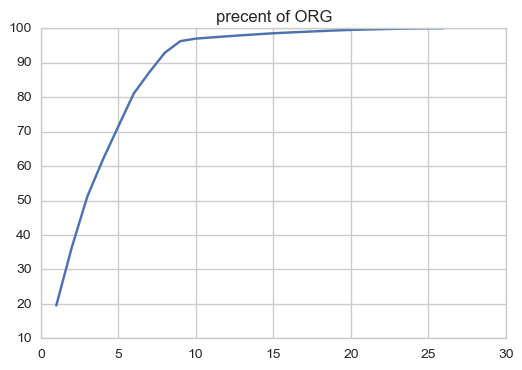

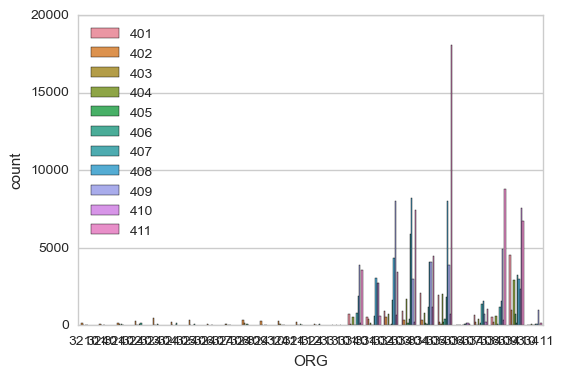

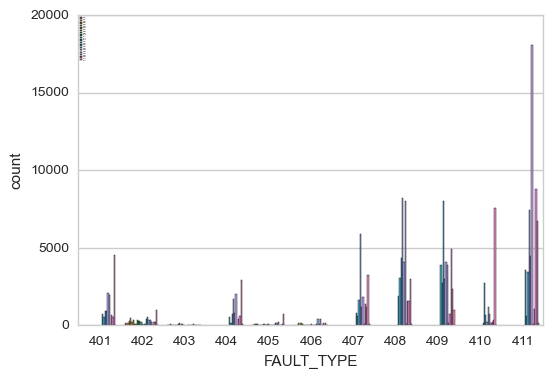

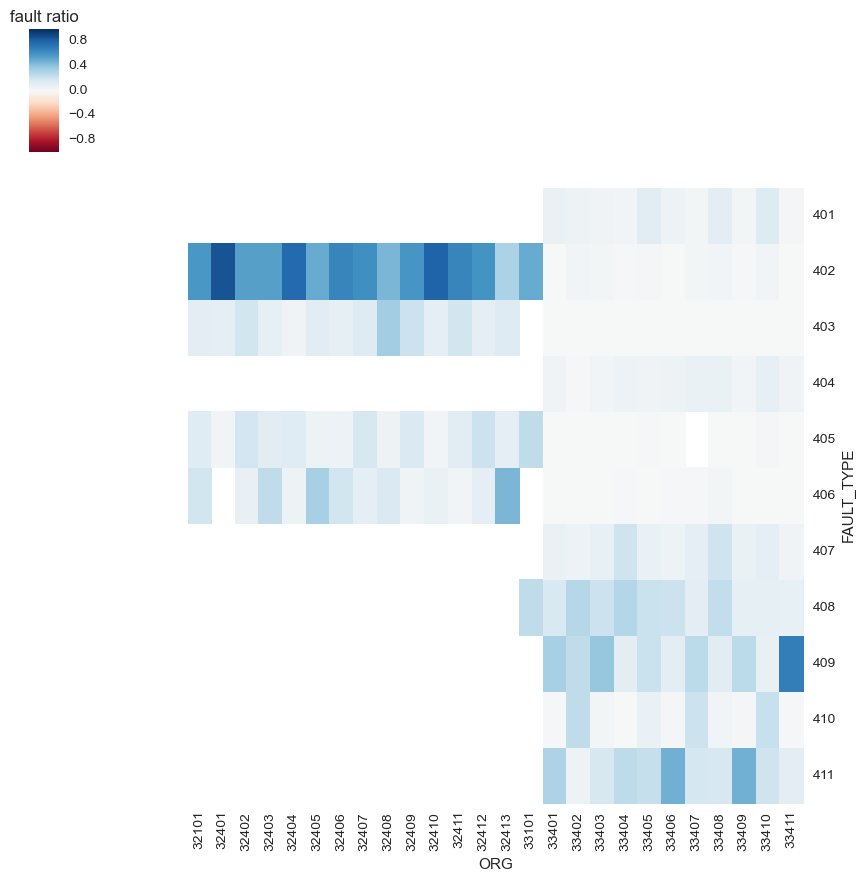

In [9]:
#ORG
data['ORG'].describe()
#plot
def plot_fun(name_fea, name_fault, fontsize=None):
    
    fig, axis1 = plt.subplots(1, 1)
    sns.countplot(x=name_fea, data=data, ax = axis1)

    fig, axis2 = plt.subplots(1, 1)
    c = data[name_fea].value_counts()
    s = c.cumsum()/c.sum()
    axis2.plot(np.arange(s.shape[0])+1, s.values*100)
    axis2.set_title('precent of %s'%name_fea)

    fig, axis3 = plt.subplots(1, 1)
    sns.countplot(x=name_fea, hue=name_fault, data=data, ax=axis3)
    plt.legend(loc = 2)

    fig, axis4 = plt.subplots(1, 1)
    sns.countplot(x=name_fault, hue=name_fea, data=data, ax=axis4)
    plt.legend(loc = 2, fontsize=fontsize)

    #calculate similar score
    from scipy.cluster.hierarchy import dendrogram, linkage    
    #clustermap

    fault_num1 = data.groupby([name_fault, name_fea])[data.columns[0]].count().unstack()

    ratio = fault_num1 / fault_num1.sum()  

    g1 = sns.clustermap(ratio, 
                        cmap=plt.get_cmap('RdBu'),
                        vmax=1,
                        vmin=-1,
                        linewidth=0,
                        figsize=(10, 10),
                        row_cluster=False,
                        col_cluster=False
                    )
    plt.title('fault ratio')

#plot
plot_fun('ORG', 'FAULT_TYPE', 1)
#get_dummies
ORG_dummies = pd.get_dummies(data['ORG'])

drop_ORG = np.concatenate((['33101', '33407', '33411'], ORG_names),axis=0)
ORG_dummies.drop(['33101', '33407', '33411'], axis=1, inplace=True)

data = data.join(ORG_dummies)
#data.drop(['ORG'], axis=1, inplace=True)
del ORG_dummies

## SPEC_CODE

In [10]:
#SPEC_CODE
data['SPEC_CODE'].describe()

count     191519
unique        11
top          102
freq      167208
Name: SPEC_CODE, dtype: object

In [11]:
data['SPEC_CODE'].value_counts()

102    167208
118     19616
131      2560
121      1818
129       135
112       103
115        45
103        29
100         2
125         2
            1
dtype: int64

In [12]:
data.drop(data[data['SPEC_CODE']==data['SPEC_CODE'].value_counts().index[-1]].index.values, axis=0, inplace=True)

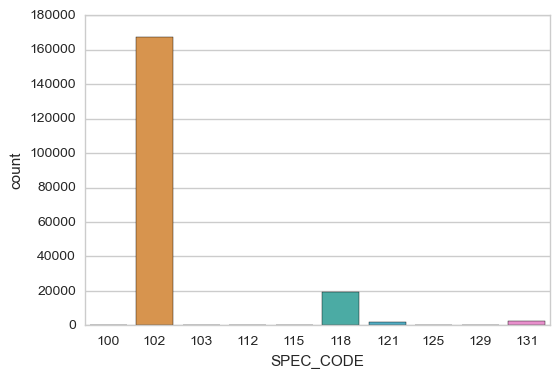

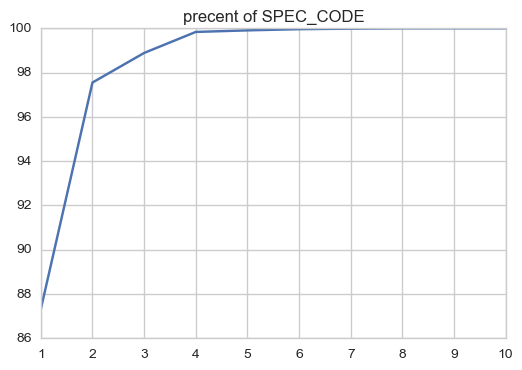

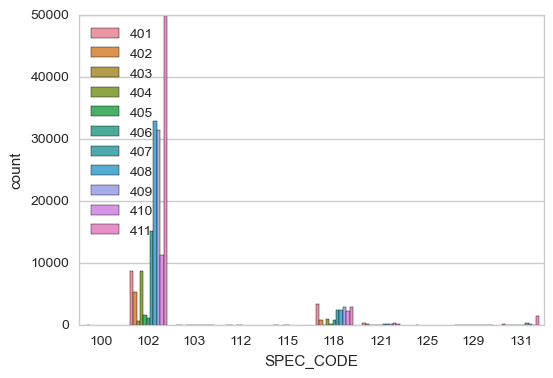

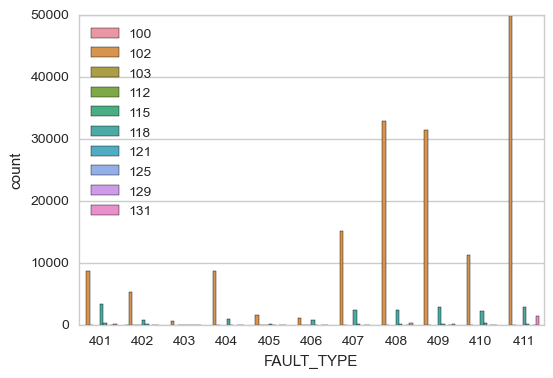

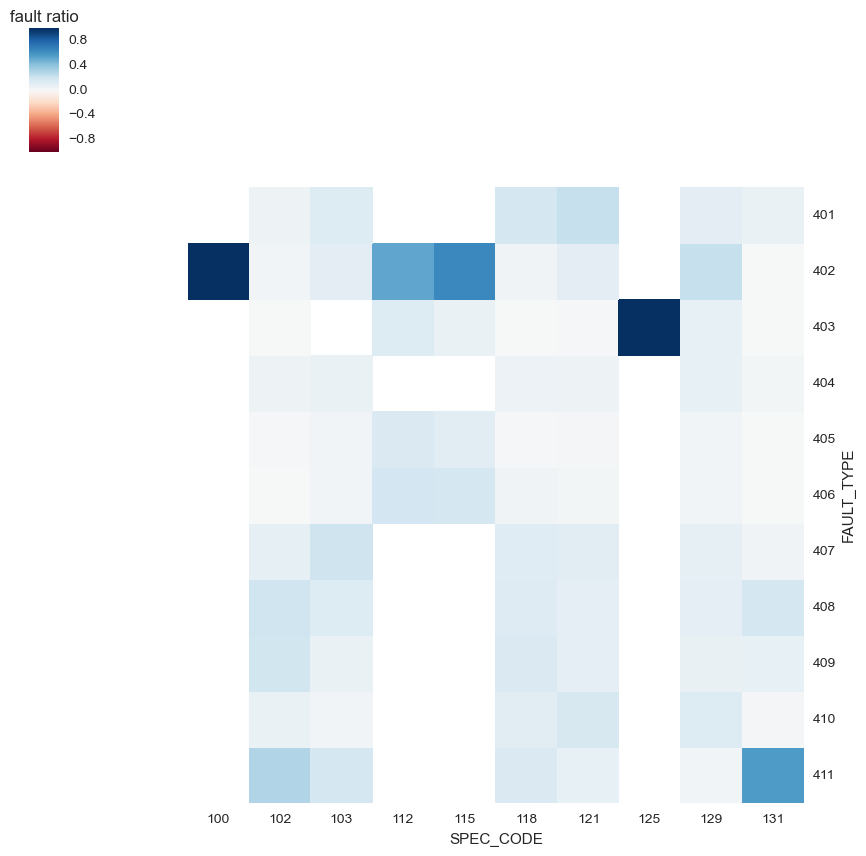

In [13]:
#plot
plot_fun('SPEC_CODE', 'FAULT_TYPE')

#get_dummies
SPEC_dummies = pd.get_dummies(data['SPEC_CODE'])

SPEC_dummies.drop(['103', '121', '129', '131'], axis=1, inplace=True)

data = data.join(SPEC_dummies)
data.drop(['SPEC_CODE'], axis=1, inplace=True)


# MANUFACTURER

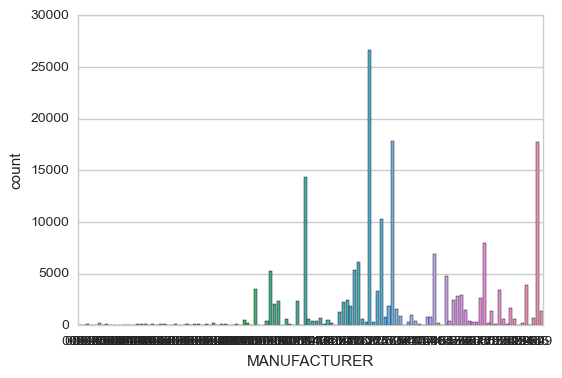

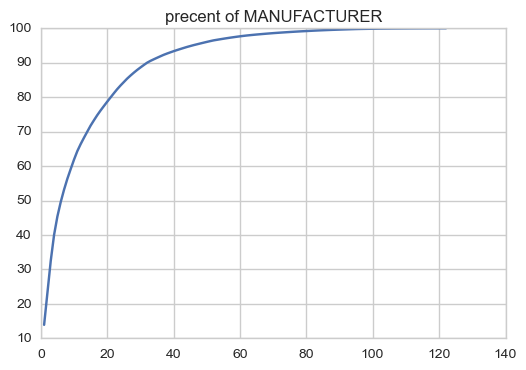

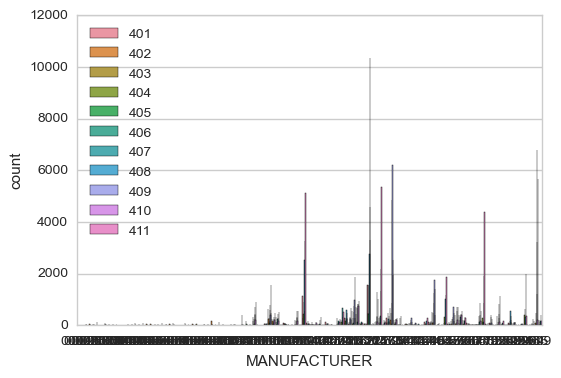

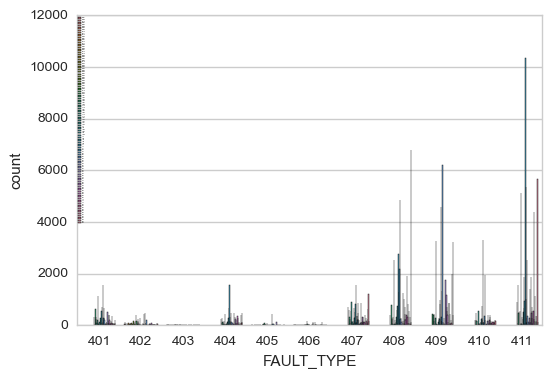

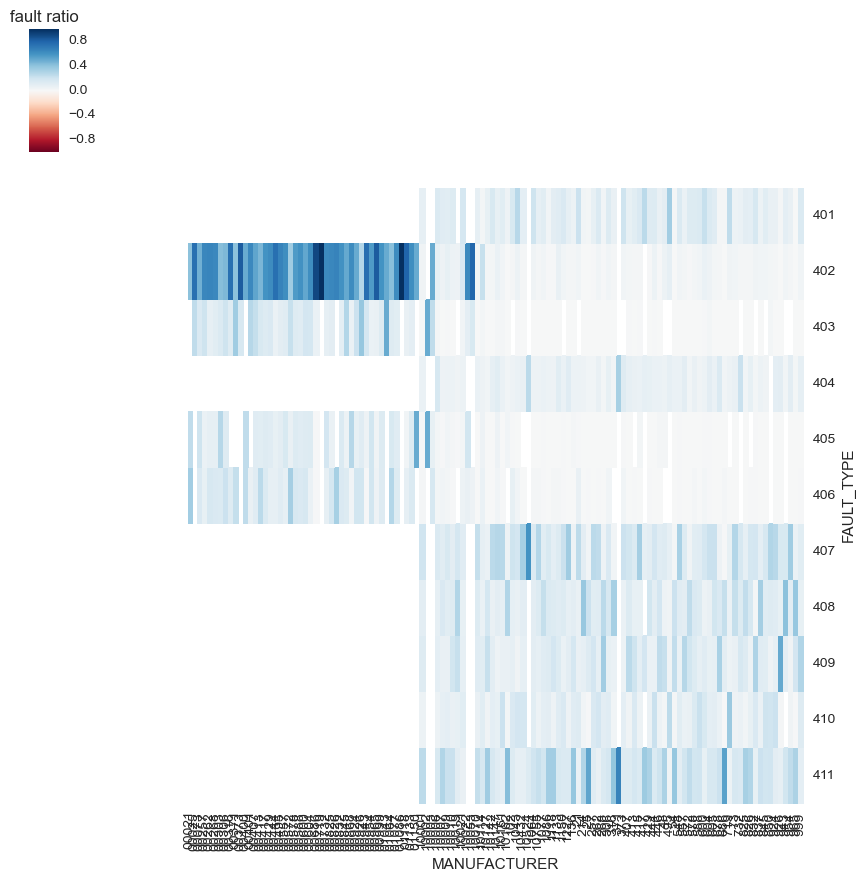

In [14]:
#plot
plot_fun('MANUFACTURER', 'FAULT_TYPE', fontsize=1)

#cluster encoding
from scipy.cluster.hierarchy import fclusterdata
fault_num3 = data.groupby(['FAULT_TYPE', 'MANUFACTURER'])[data.columns[0]].count().unstack()

MAN_ratio = fault_num3 / fault_num3.sum()
MAN_ratio_T = MAN_ratio.T

clusters = fclusterdata(np.array(MAN_ratio_T), 1)
clusters_mapping = {label:idx for label,idx in zip(MAN_ratio.columns, clusters)}


data['MANUFACTURER'] = data['MANUFACTURER'].map(clusters_mapping)

#get_dummies
MAN_dummies = pd.get_dummies(data['MANUFACTURER'])
data = data.join(MAN_dummies)
data.drop(['MANUFACTURER'], axis=1, inplace=True)

del MAN_ratio, MAN_ratio_T, clusters, clusters_mapping, MAN_dummies

# MONTH

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f021eee1810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f021dccf290>], dtype=object)

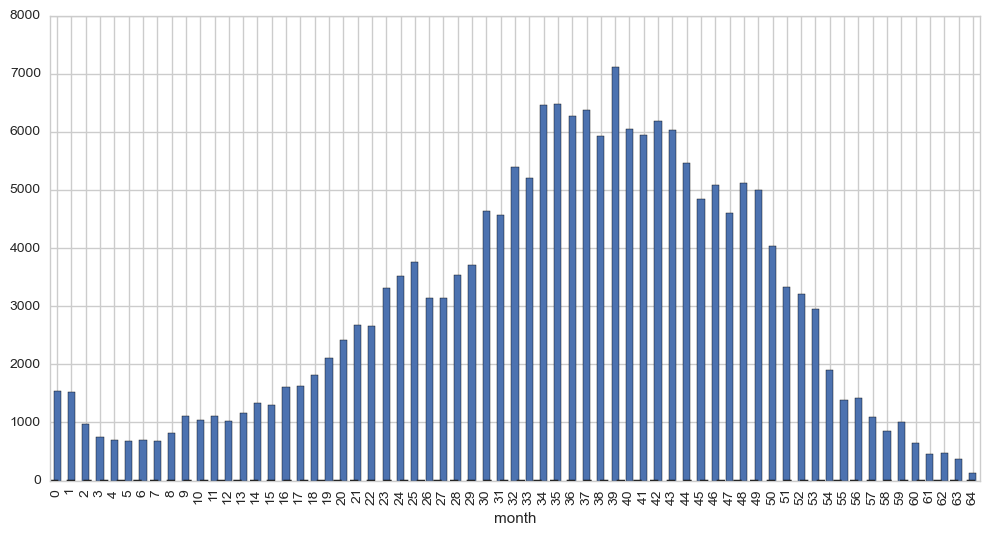

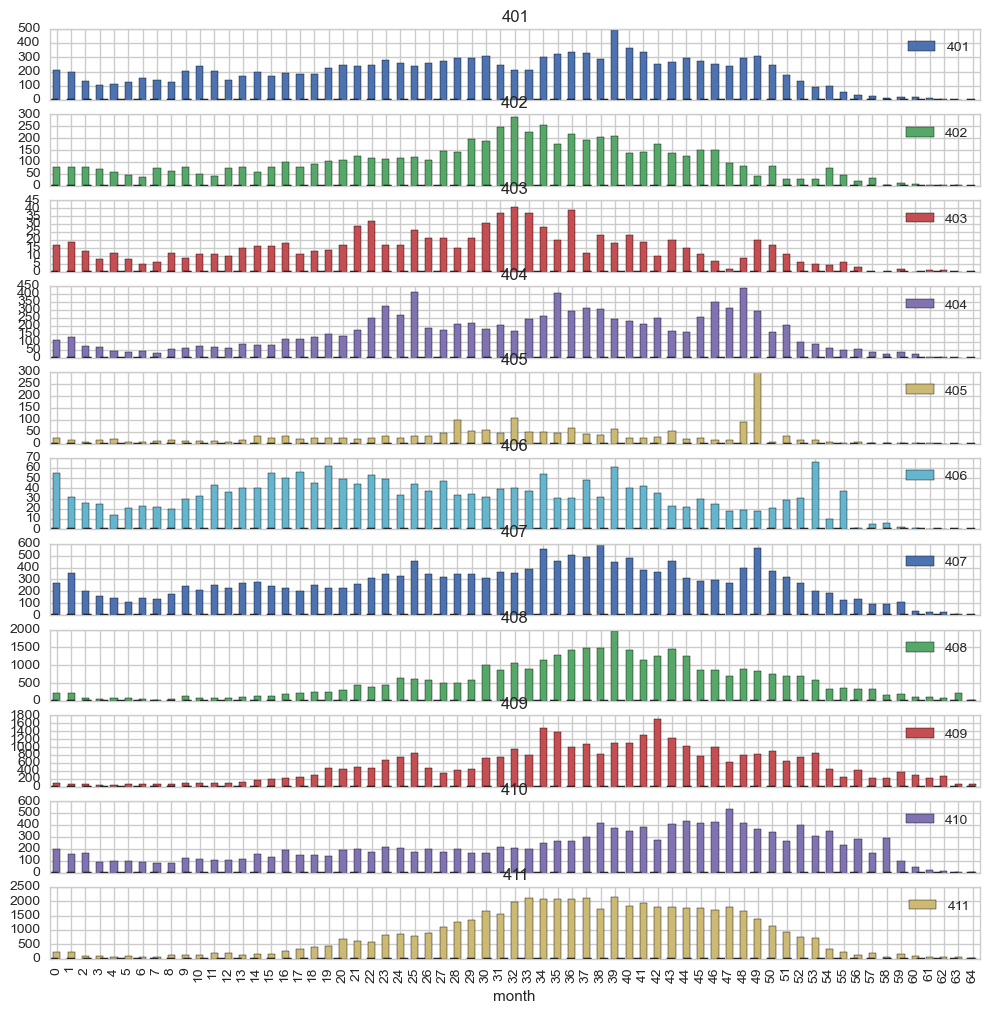

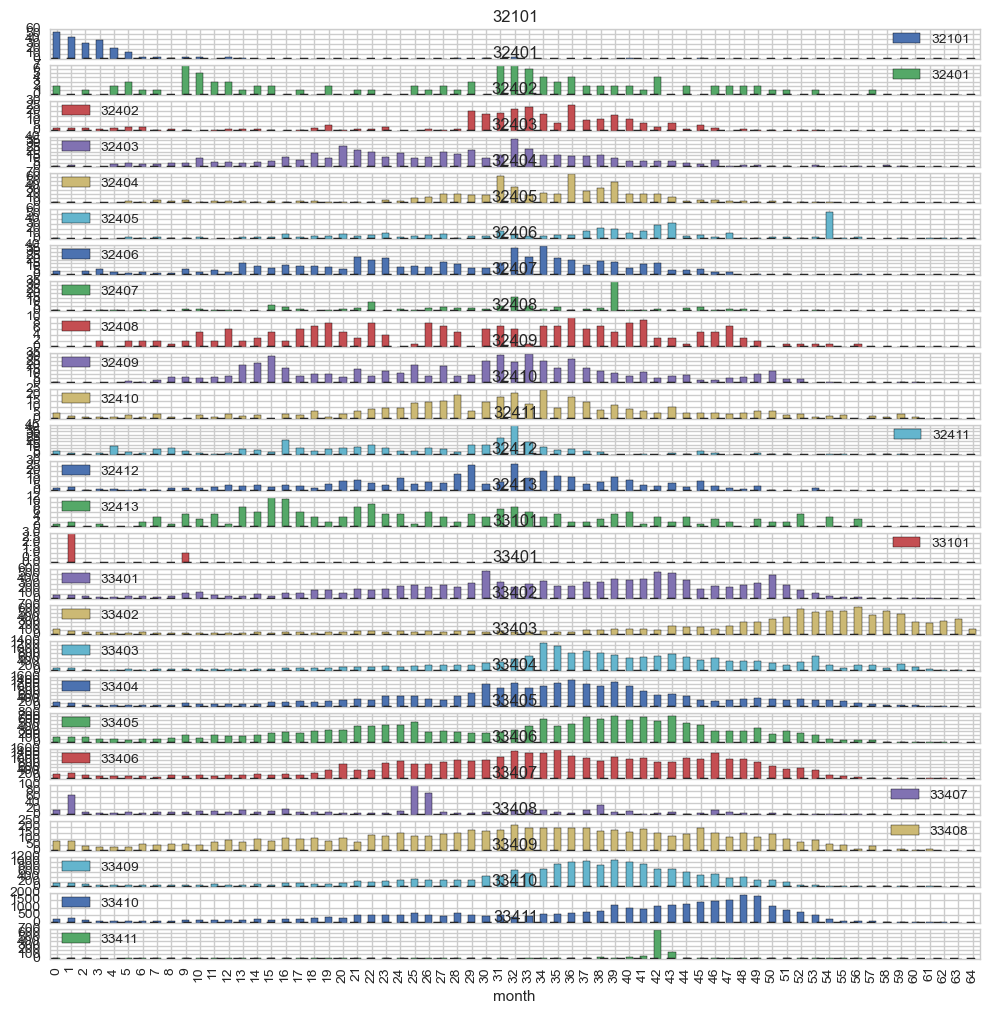

In [15]:
# use month distribution
c1 = data.groupby(['month']).size()
c1.plot(kind='bar', figsize=(12, 6))

c2 = data.groupby(['month', 'FAULT_TYPE']).size().unstack().reindex(index=np.arange(data.month.min(), data.month.max()+1)).fillna(0)
c2.plot(kind='bar', figsize=(12, 12), subplots=True)

c3 = data.groupby(['month', 'ORG']).size().unstack().reindex(index=np.arange(data.month.min(), data.month.max()+1)).fillna(0)
c3.plot(kind='bar', figsize=(12, 12), subplots=True)

## FAULT_MONTH

[29 29 21 21 26 27 28 24 23 22 25 22]


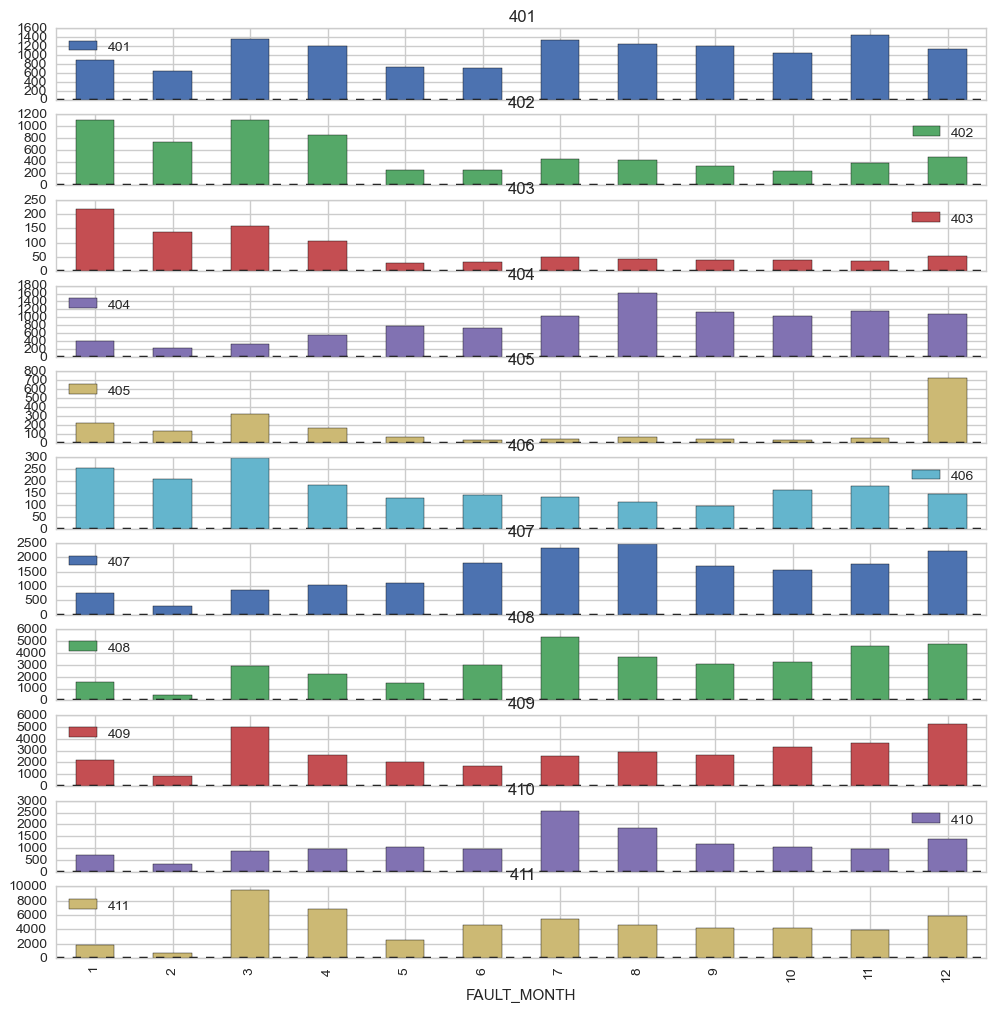

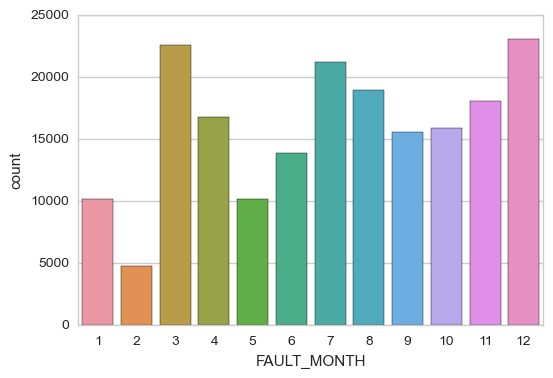

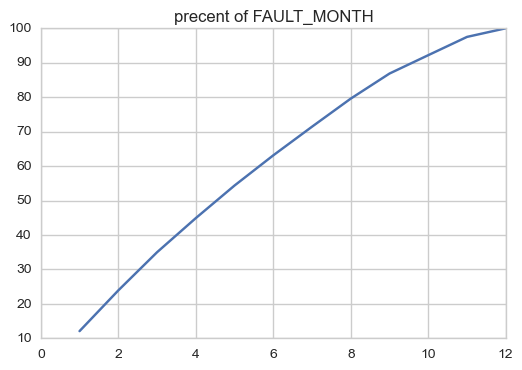

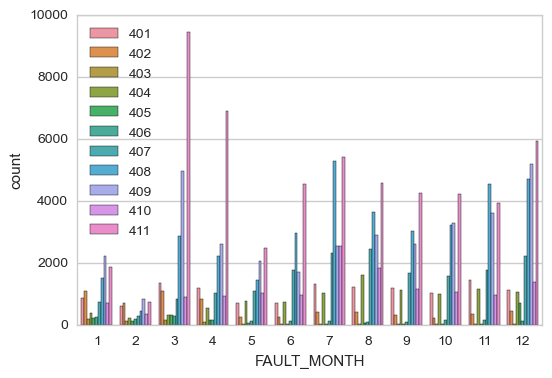

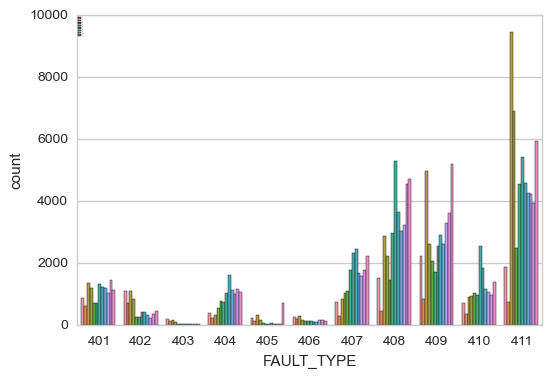

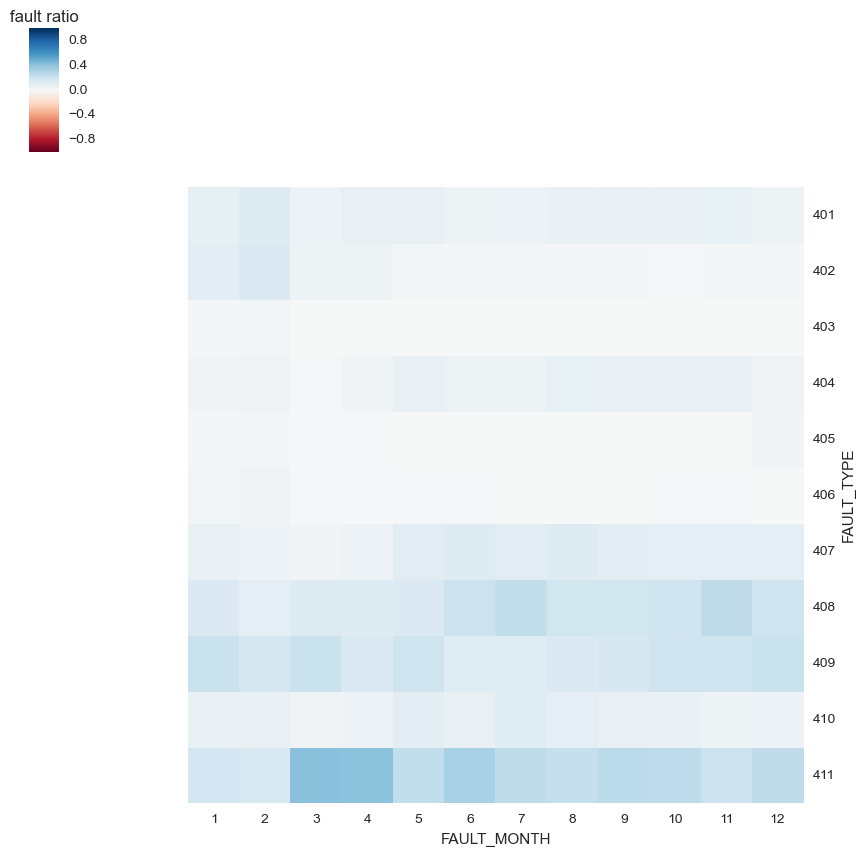

In [16]:
data['FAULT_MONTH'] = pd.Categorical(data['FAULT_MONTH'], ordered=True)

m1 = data.groupby(['FAULT_MONTH', 'FAULT_TYPE']).size().unstack().reindex(index=np.arange(data.FAULT_MONTH.min(), data.FAULT_MONTH.max()+1)).fillna(0)
m1.plot(kind='bar', figsize=(12, 12), subplots=True)
plot_fun('FAULT_MONTH', 'FAULT_TYPE', fontsize=1)

fault_num4 = data.groupby(['FAULT_TYPE', 'FAULT_MONTH'])[data.columns[0]].count().unstack()

FAUMON_ratio = fault_num4 / fault_num4.sum()
FAUMON_ratio_T = FAUMON_ratio.T

clusters = fclusterdata(np.array(FAUMON_ratio_T), 0.70)
clusters = clusters+20
print clusters

clusters_mapping = {label:idx for label,idx in zip(FAUMON_ratio.columns, clusters)}


data['FAULT_MONTH'] = data['FAULT_MONTH'].map(clusters_mapping)

#get_dummies
FAUMON_dummies = pd.get_dummies(data['FAULT_MONTH'])
data = data.join(FAUMON_dummies)
data.drop(['FAULT_MONTH'], axis=1, inplace=True)
del fault_num4, FAUMON_ratio, FAUMON_ratio_T, clusters, clusters_mapping, FAUMON_dummies

In [17]:
data.drop(['ORG','INST_MONTH'], axis=1, inplace=True)

# XGBoost

[0]	train-merror:0.539574+0.00474897	test-merror:0.557112+0.00360459
[1]	train-merror:0.517897+0.00473217	test-merror:0.540388+0.00352657
[2]	train-merror:0.507797+0.00523898	test-merror:0.533203+0.00380491
[3]	train-merror:0.502147+0.0050968	test-merror:0.528581+0.00350538
[4]	train-merror:0.496049+0.00430937	test-merror:0.524592+0.00318803
[5]	train-merror:0.492437+0.00305202	test-merror:0.522269+0.00240979
[6]	train-merror:0.489467+0.00228963	test-merror:0.520376+0.00241395
[7]	train-merror:0.487325+0.00302512	test-merror:0.519159+0.00302853
[8]	train-merror:0.485037+0.00299216	test-merror:0.518263+0.00303425
[9]	train-merror:0.483139+0.00301463	test-merror:0.517063+0.0030554
[10]	train-merror:0.482282+0.00281515	test-merror:0.516603+0.00315692
[11]	train-merror:0.480887+0.00293825	test-merror:0.516136+0.00313485
[12]	train-merror:0.479975+0.00260012	test-merror:0.515684+0.00267853
[13]	train-merror:0.47943+0.00263957	test-merror:0.515426+0.00261515
[14]	train-merror:0.478904+0.0025

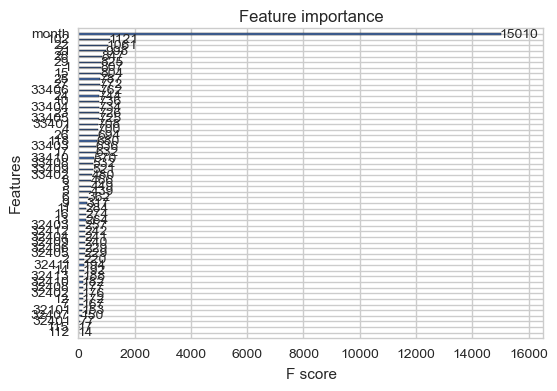

In [19]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
import pickle

TRAIN = True  #是否训练
data_X = data.drop(['FAULT_TYPE', QUIP_ID], axis=1)
data_y = data['FAULT_TYPE']
#encode label
le = preprocessing.LabelEncoder()
data_y = le.fit_transform(data_y)

#split train set and test set
train, test, train_y, test_y = train_test_split(data_X, data_y, test_size=0.33, random_state=27)
dtrain = xgb.DMatrix(train, train_y)
dtest = xgb.DMatrix(test)

clf = xgb.XGBClassifier(
    learning_rate = 0.3,
    n_estimators = 300,
    max_depth = 11,
    colsample_bytree = 0.8,
    subsample = 0.9,
    objective = 'multi:softmax',
    min_child_weight = 1,
    gamma = 2,
    seed = 27
    )

param = clf.get_xgb_params()
param['num_class'] = 11
cvresult = xgb.cv(param, dtrain, num_boost_round=1000, nfold=3, stratified=True,
                  metrics='merror', early_stopping_rounds=10,verbose_eval=True)

clf.set_params(n_estimators=cvresult.shape[0])   #set n_estimators as cv rounds
if TRAIN:
    clf.fit(train, train_y, eval_metric='merror')
else:
    clf = pickle.load(open("zhejiang_4_2.pkl", "rb"))
        

ypred = clf.predict(test)
ypred = le.inverse_transform(ypred)
test_y = le.inverse_transform(test_y)
#print model report:
print(classification_report(test_y, ypred))
print(confusion_matrix(test_y, ypred))

xgb.plot_importance(clf.booster())
pickle.dump(clf, open("zhejiang_4_2.pkl", "wb"))

In [ ]:
param_test1 = {'max_depth':range(5,12,2), 'min_child_weight':range(1,7,2)}
gsearch1 = GridSearchCV(estimator=clf, param_grid = param_test1, scoring='accuracy',n_jobs=-1,cv=2, verbose=True)
gsearch1.fit(train, train_y)
print gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
data['FAULT_TYPE'].value_counts()

In [ ]:
np.concatenate((['1','2'], ORG_names), axis = 0)

In [ ]:
ORG_names